In this notebook we will discuss about simple neural network. We will look at Digit recognaion. First we will try without hidden layers and then we will try with hidden layers. 

Homework:
1. Change optimizer, loss function, and activation function.

#### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset from keras library

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape[0]

28

In the below cell I performed scaling because it is the technique that helps to improve the accuracy of the matrix.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

To visualize the data we will use matplot

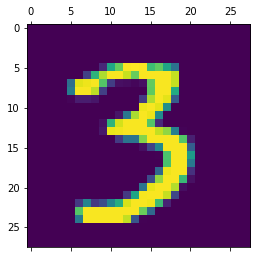

In [ ]:
plt.matshow(X_train[10000])

In [ ]:
y_train[10000]

3

Our X_train and X_test datset are 2D data. So we want to covert it into the vector of length 28*28 so we need to flatten our dataset

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

#### Neural network

This is simple neural network without hidden layers.

In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape = (784, ), activation='sigmoid')
])

# now we need to compile it
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7331 - accuracy: 0.8063
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3084 - accuracy: 0.9136
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2898 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.9243
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2651 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2609 - accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9300
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2477 - accuracy: 0.9308
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.253

Now evaluating the model on the test dataset

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.9273


[0.2633701264858246, 0.927299976348877]

Now predicting the result

In [ ]:
predict = model.predict(X_test_flattened)

Output of the below cell will conatin 10 values, predicting the chances of the number being as first number. and by looking at the values we can clearly say that, that the number is 7 and prediction for that number is 9.99 percent.

In [ ]:
predict[0]

array([3.1408072e-03, 1.5478289e-08, 2.3098797e-02, 9.7330213e-01,
       1.4747083e-03, 1.3605779e-01, 3.7522263e-08, 9.9983996e-01,
       7.8672051e-02, 6.4675897e-01], dtype=float32)

we are using argmax function from numpy library to get the bigger value of our prediction

In [ ]:
np.argmax(predict[0])

7

we are just cross cheking if the value is is correct or not.

In [ ]:
y_test[0]

7

Now as you know y_test values are in the integer and predict values are in float and also there are 10 different values and we just want one so we will use for loop

In [ ]:
predicted_lables = [np.argmax(i) for i in predict]
predicted_lables[:5]

[7, 2, 1, 0, 4]

now we will look into confusion matrix

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    2,    2,    0,    9,   10,    4,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    8,  937,   17,    7,    4,   11,    8,   32,    5],
       [   1,    0,   20,  920,    1,   25,    2,   10,   23,    8],
       [   1,    1,    7,    1,  908,    0,    9,    4,    9,   42],
       [   7,    2,    3,   40,    7,  778,   15,    6,   27,    7],
       [   9,    3,    8,    1,    7,   13,  914,    1,    2,    0],
       [   1,    6,   26,    6,    7,    1,    0,  945,    3,   33],
       [   4,    9,    7,   22,    9,   23,    9,    9,  873,    9],
       [   7,    7,    3,    9,   20,    6,    0,   16,    8,  933]],
      dtype=int32)>

Above cell gives us the output but we want to visulize the output in pictorial format so we will use seaborn

Text(69.0, 0.5, 'Truth')

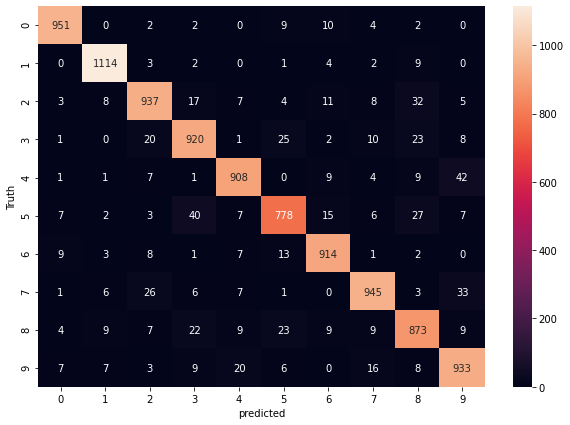

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

#### Now we will be using Dense layer

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784, ), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4620 - accuracy: 0.8689
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1301 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0842 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9848


evaluating the dense layer

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9756


[0.08044438064098358, 0.975600004196167]

In [ ]:
# prediction

Text(69.0, 0.5, 'Truth')

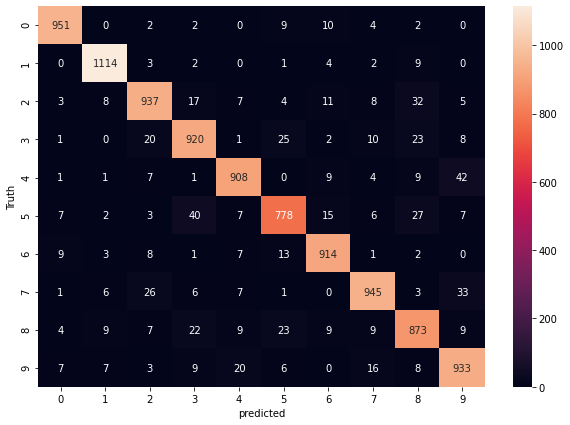

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

Now previously we used faltten method to flatten our array but keras comes with flatten method

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8811
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1300 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0627 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9851


## Home work

 is we have use different optimizers and different loss functions to so that we will refer tensorflow documents

1. KLD
 
 Loss function

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784, ), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss = 'KLD',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1833 - accuracy: 0.1228
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 7.0850e-06 - accuracy: 0.1169
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2049e-07 - accuracy: 0.1074
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: -9.8210e-07 - accuracy: 0.1026
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: -1.3671e-06 - accuracy: 0.1006


2. 
MAE

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784, ), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss = 'MAE',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6743 - accuracy: 0.1502
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6420 - accuracy: 0.1429
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6476 - accuracy: 0.1190
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6470 - accuracy: 0.1110
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6351 - accuracy: 0.1061


3. binary_crossentropy

4. hinge

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784, ), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss = 'hinge',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1000 - accuracy: 0.0739
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0979 - accuracy: 0.0998
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0984 - accuracy: 0.0998
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0983 - accuracy: 0.0995
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0988 - accuracy: 0.0993


Now optimizers

1. Adamax

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784, ), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adamax', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6316 - accuracy: 0.8331
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2333 - accuracy: 0.9355
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1802 - accuracy: 0.9500
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1472 - accuracy: 0.9582
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1250 - accuracy: 0.9654


2. Adadelta

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784, ), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adadelta', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3093 - accuracy: 0.1247
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1567 - accuracy: 0.2347
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0207 - accuracy: 0.3508
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8919 - accuracy: 0.4667
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7706 - accuracy: 0.5725


3. ftrl

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784, ), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='FTRL', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3025 - accuracy: 0.1113
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2888 - accuracy: 0.2232
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0658 - accuracy: 0.3934
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5406 - accuracy: 0.5779
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1817 - accuracy: 0.6773
